## Import Library

In [47]:
import cv2 #labrary untuk mengimport dan menampilkan gambar
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread("WahidUts.jpg")

In [10]:
img.shape

(1200, 1600, 3)

## Membuat Baris dan Kolom

In [11]:
(baris, kolom) = img.shape[:2]

In [48]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #mengkonversi dari BGR ke RGB

## Hasil Gambar yang Sudah Di Ubah Dari BGR ke RGB

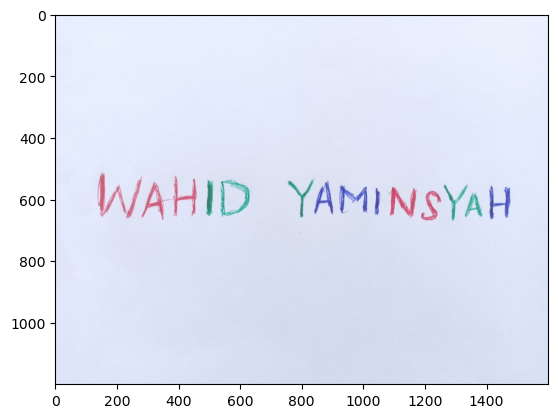

In [13]:
plt.imshow(img)

## Mendeteksi Warna Pada Citra

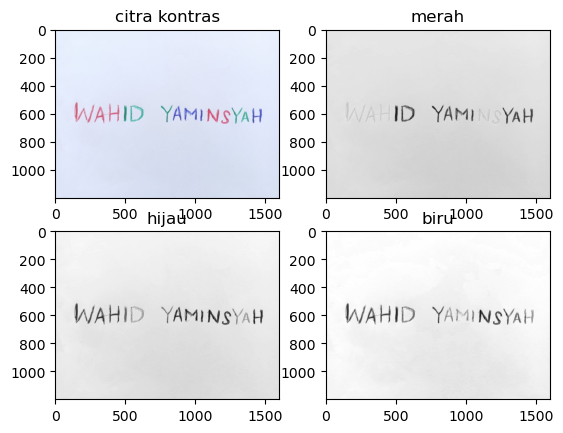

In [36]:
#gambar citra kontras
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('citra kontras')

#deteksi warna biru
plt.subplot(2, 2, 4)
plt.imshow(img[:,:,2], cmap="gray") 
plt.title('biru')

#deteksi warna merah
plt.subplot(2, 2, 2)
plt.imshow(img[:,:,0], cmap="gray") 
plt.title('merah')

#deteksi warna hijau
plt.subplot(2, 2, 3)
plt.imshow(img[:,:,1], cmap="gray") 
plt.title('hijau')

plt.show()

## Menampilkan Histogram

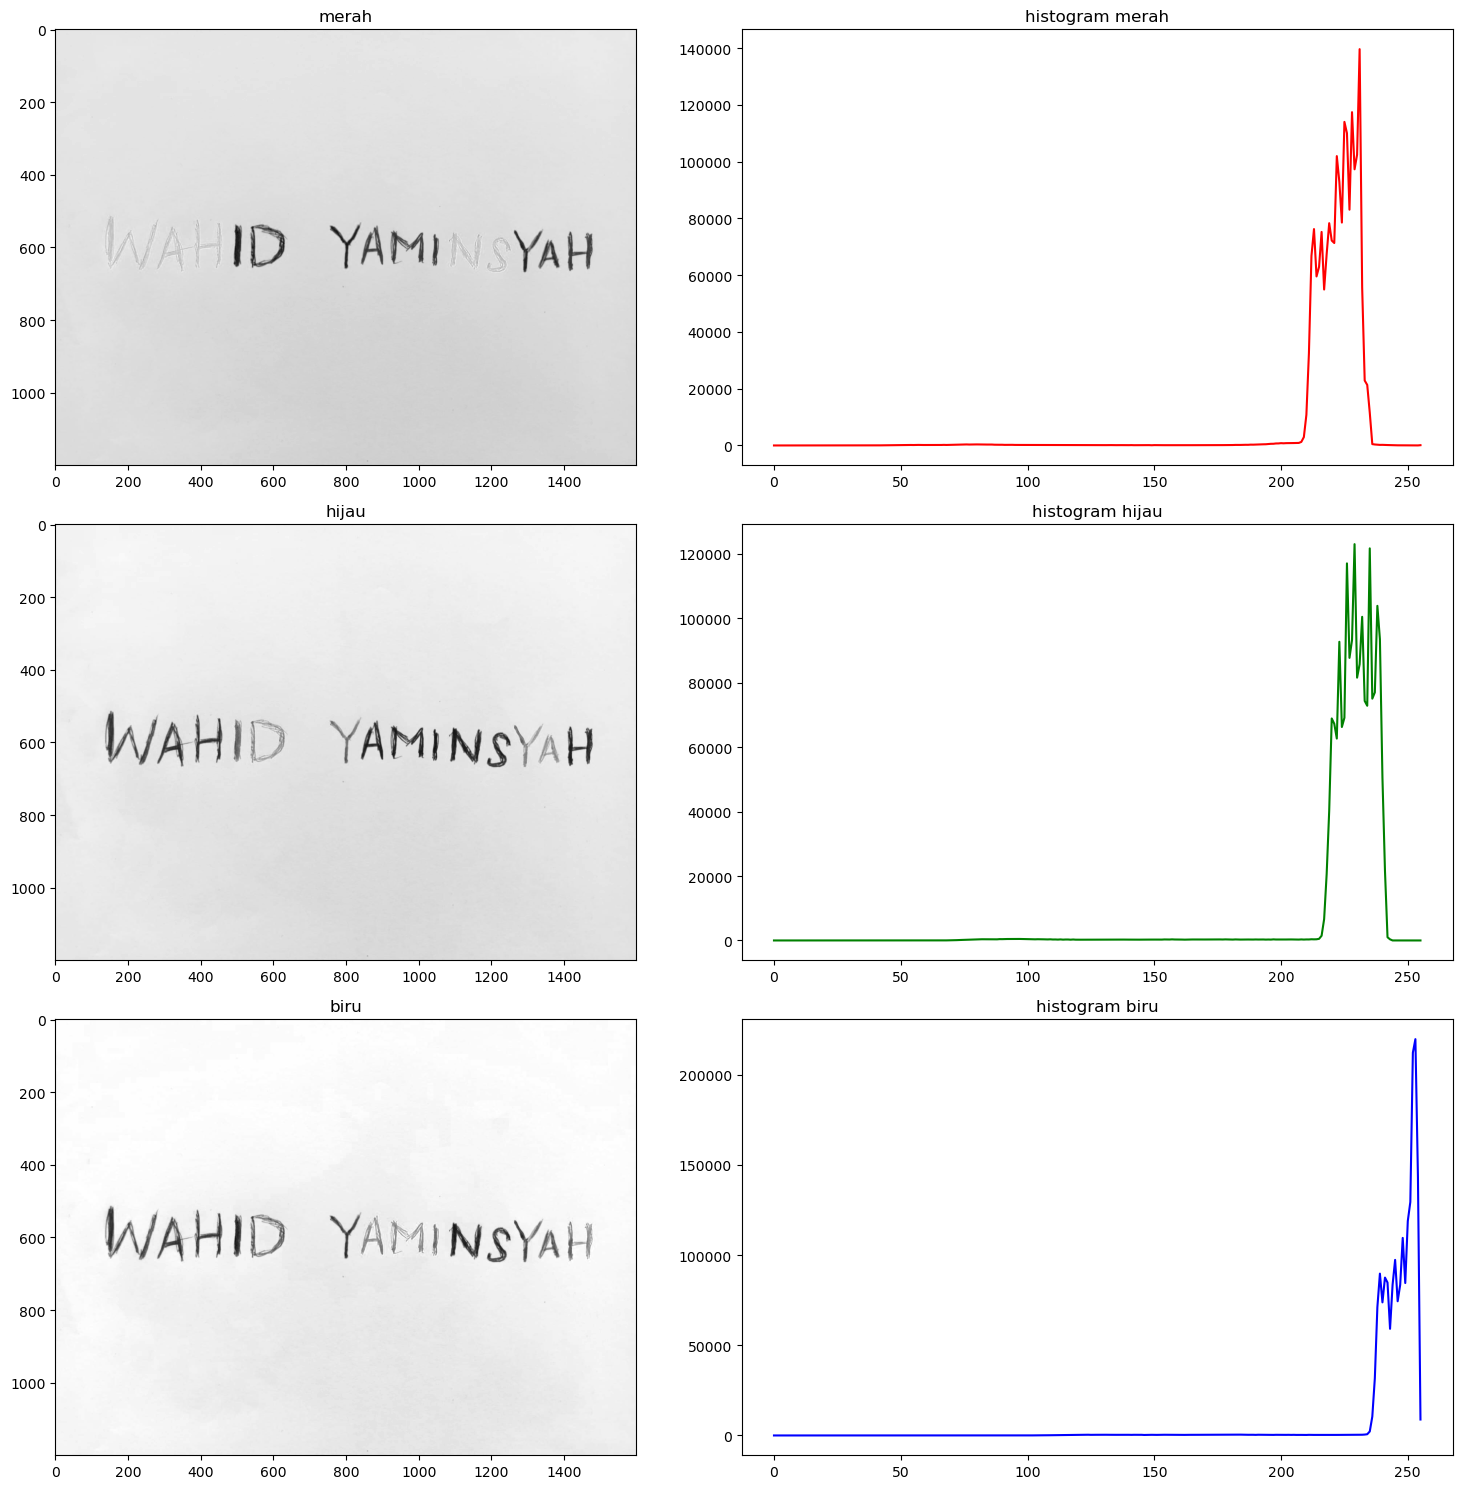

In [39]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

#Biru
biru = img[:, :, 2]
hist_biru = cv2.calcHist([biru], [0], None, [256], [0, 256])
axs[2, 0].imshow(biru, cmap='gray')
axs[2, 0].set_title('biru')
axs[2, 1].plot(hist_biru, color='b')
axs[2, 1].set_title('histogram biru')

#Merah
merah = img[:, :, 0]
hist_merah = cv2.calcHist([merah], [0], None, [256], [0, 256])
axs[0, 0].imshow(merah, cmap='gray')
axs[0, 0].set_title('merah')
axs[0, 1].plot(hist_merah, color='r')
axs[0, 1].set_title('histogram merah')

#Hijau
hijau = img[:, :, 1]
hist_hijau = cv2.calcHist([hijau], [0], None, [256], [0, 256])
axs[1, 0].imshow(hijau, cmap='gray')
axs[1, 0].set_title('hijau')
axs[1, 1].plot(hist_hijau, color='g')
axs[1, 1].set_title('histogram hijau')

plt.tight_layout()
plt.show()

## Ambang Batas Citra

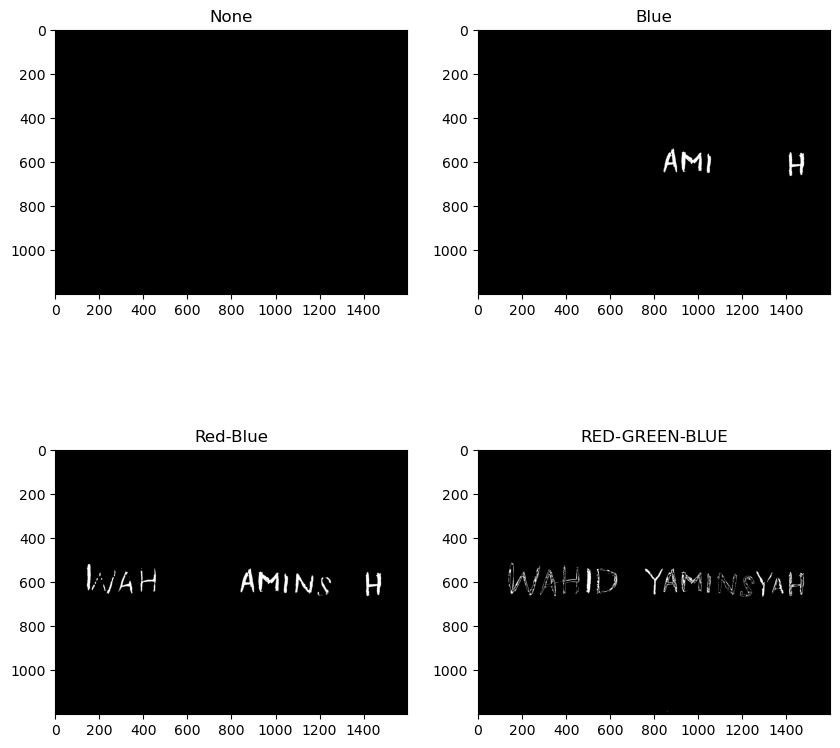

In [72]:
# Konversi citra ke ruang warna HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
fig, axs=plt.subplots(2,2, figsize =(10,10))
# Tentukan batas atas dan batas bawah yang ekstrem sehingga tidak ada warna yang cocok
lower_threshold = np.array([0, 0, 0])
upper_threshold = np.array([0, 0, 0])

# Buat mask dengan batas atas dan batas bawah yang ekstrem
mask = cv2.inRange(hsv, lower_threshold, upper_threshold)

# Tampilkan mask
axs[0, 0].imshow(mask, cmap='gray')
axs[0, 0].set_title('None')

# Tentukan batas warna biru
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Buat mask untuk warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Tampilkan mask untuk warna biru
axs[0, 1].imshow(mask, cmap='gray')
axs[0, 1].set_title('Blue')

# Tentukan batas atas dan batas bawah untuk warna merah dalam ruang warna HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Buat mask untuk warna biru dan merah
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Gabungkan mask biru dan mask merah
mask_combined = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined = cv2.bitwise_or(mask_combined, mask_red2)

# Tampilkan mask
axs[1, 0].imshow(mask_combined, cmap='gray')
axs[1, 0].set_title('Red-Blue')

(thresh, binary4) = cv2.threshold(gray, 145, 255, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap = 'gray')
axs[1,1].set_title('RED-GREEN-BLUE')

plt.show()